# Problem 10: Transient Calibration

# INTRODUCTION
_Most modeling studies deal with a steady-state calibration such as the one performed in the previous problem. It is often desirable and sometimes necessary to perform a transient calibration. This problem gives an example of a transient calibration and cites a common misapplication of the transient calibration process._

# PROBLEM STATEMENT
_A regional coastal area has been experiencing a drought for the past six months. Hydrography data (shown in Table 10.1) indicates that water levels have dropped as much as 5 ft in the unconfined aquifer since the drought began. Water resource officials are interested in the amount of net recharge reduction that has occurred. A numerical model is being used to assess the situation.
Because all flow is toward the coast a simple one-dimensional model is being used. A great deal of confidence exists in the specific yield value of 0.1 and the pre-drought recharge rate of 20 in/yr. Hydraulic conductivity is assumed to be uniform within the aquifer and has been estimated to be 850 ft/d. The aquifer base is uniformly at -120 ft. The model is a single row of 15 nodes, each of which is 1 mile in length. The coastal boundary is simply a constant head of 0.0 ft on the right side of the model (column 15) as shown in Figure 10.1. Elsewhere, the nodes in the model are active. Pre-drought water levels which remained fairly steady for a number of years are shown in Table 10.2.
Set up the model and determine the recharge rate reduction that has caused the observed groundwater level decline at node (1, 5) shown in Table 10.1._

In [1]:
#Import and modules/packages that we need to work with
%matplotlib inline
import os
import sys
import platform
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import flopy

In [14]:
#Store the values of each parameter into separate variables
inh = 0.0 #initial head
hk = 850 #hydraulic conductivity in ft/day (uniform)
sy = .1 #storage yield
delr = 1*5280 #grid spacing in feet (uniform)
delc = delr
b = -120 #base in ft (uniform)
perlen = 183 #stress period length in days
nstp = 15 #number of time steps
#tsmult = 261 #time step multiplier
it_par = 5 # iteration parameters
mxiter = 50 #maximum number of iterations
accel_par = 1.0 #acceleration parameter
hclose = 0.01 #closure criterion (the head change criterion for convergence)
botm = -1
nper = 1
ipakcb = 50
nlay = 1 #number of layers
nrow = 1 #number of rows
ncol = 15 #number of columns
laytyp = np.zeros((nlay))

In [15]:
#Flopy objects
modelname = 'p10' #short for problem 10
exe_name = '../MF2005.1_12/bin/mf2005.exe'
model_ws = 'temp'
mf = flopy.modflow.Modflow(modelname, exe_name=exe_name, model_ws = model_ws)

In [16]:
#call in the discretization package
top = 0
#if ncol == 15:
#    top = 0
#else:
#    top !=0
dis = flopy.modflow.ModflowDis(mf, nlay, nrow, ncol, delr=delr, delc=delc,
                               top=top, botm=botm, nper=nper, perlen=perlen, 
                               nstp=nstp, steady=False)

In [17]:
#call in the basic package
ibound = np.ones((nlay, nrow, ncol))
strt = 0.0
bas = flopy.modflow.ModflowBas(mf, ibound=ibound, strt=strt)

In [18]:
#call in the layer-propery flow (LPF)
lpf = flopy.modflow.ModflowLpf(mf, hk=hk, sy=sy, laytyp=laytyp, ipakcb=ipakcb)

In [19]:
#call in the preconditioned conjugate-gradient package (PCG) 
pcg = flopy.modflow.ModflowPcg(mf, mxiter=mxiter, hclose=hclose)

In [20]:
#recharge package (RCH)

#fname='..\Data\p10_rch.txt'
#print(os.path.isfile(fname))
#with open(fname) as f:
#    data = f.read().splitlines()
#f.close()

rech = 20/(12*365) #recharge rate ft/day
rch = flopy.modflow.ModflowRch(mf, rech=rech)


In [21]:
print(rech)

0.0045662100456621


In [22]:
#call in the output control package (OC)
oc = flopy.modflow.ModflowOc(mf, stress_period_data={(0, 0): ['save head', 'print budget', 'save budget']})

In [23]:
# Write the MODFLOW model input files
mf.write_input()

In [24]:
# Run the MODFLOW model
success, buff = mf.run_model()

FloPy is using the following executable to run the model: ../MF2005.1_12/bin/mf2005.exe

                                  MODFLOW-2005     
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUND-WATER FLOW MODEL
                             Version 1.12.00 2/3/2017                        

 Using NAME file: p10.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2017/07/21 10:18:15

 Solving:  Stress period:     1    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     2    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     3    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     4    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     5    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     6    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     7    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     8    Ground

In [82]:
import flopy.utils.binaryfile as bf

# Create the headfile object
fname = os.path.join(model_ws, 'p10.hds') #"os.path.join" joins together the modelname and the .hds file and stores it in fname
headobj = bf.HeadFile(fname) #create headobj and put values from fname (aka 'p1_pa.hds') inside it
times = headobj.get_times() #assign the headobj values to the variable "times"
print(times) #prints the time at each stress period

#print hydraulic head (Table 14.2)
idx = (0, 0, 4) #(nlay, nrow, ncol) *remember you have to subtract 1 from the original numbers for python - (1, 10, 12)*
ts = headobj.get_ts([idx])
print(ts)

[12.2, 24.4, 36.599998, 48.799999, 61.0, 73.199997, 85.399994, 97.599991, 109.79999, 121.99998, 134.19998, 146.39998, 158.59998, 170.79997, 182.99997]
[[  1.21999998e+01   5.57077637e+03]
 [  2.43999996e+01   1.11415527e+04]
 [  3.65999985e+01   1.67123281e+04]
 [  4.87999992e+01   2.22831055e+04]
 [  6.10000000e+01   2.78538809e+04]
 [  7.31999969e+01   3.34246562e+04]
 [  8.53999939e+01   3.89954336e+04]
 [  9.75999908e+01   4.45662109e+04]
 [  1.09799988e+02   5.01369844e+04]
 [  1.21999985e+02   5.57077617e+04]
 [  1.34199982e+02   6.12785391e+04]
 [  1.46399979e+02   6.68493125e+04]
 [  1.58599976e+02   7.24200938e+04]
 [  1.70799973e+02   7.79908672e+04]
 [  1.82999969e+02   8.35616406e+04]]


(0, 182.99997)

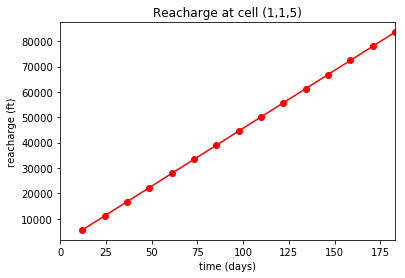

In [85]:
# Plot the head versus time
plt.subplot(1, 1, 1)
ttl = 'Reacharge at cell ({0},{1},{2})'.format(idx[0] + 1, idx[1] + 1, idx[2] + 1)
plt.title(ttl)
plt.xlabel('time (days)')
plt.ylabel('reacharge (ft)')
plt.plot(ts[:, 0], ts[:, 1], 'ro-')
plt.xlim(0, ts[:, 0].max())
#plt.ylim(ts[:, 1].min(), ts[:, 1].max())

(0, 182.99997)

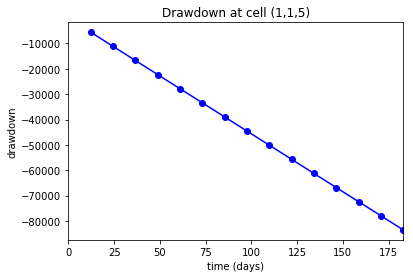

In [96]:
# Plot the drawdown versus time
plt.subplot(1, 1, 1)
ttl = 'Drawdown at cell ({0},{1},{2})'.format(idx[0] + 1, idx[1] + 1, idx[2] + 1) #we are adding 1 to each part of idx to that it prints out the real values and not the code values
plt.title(ttl) #prints/plots title
plt.xlabel('time (days)') #labels the x-axis
plt.ylabel('drawdown') #labels the y-axis
#here we do "0-ts..." in order to show the drawdown of 
plt.plot(ts[:, 0], 0-ts[:, 1], 'bo-') #(x, y, color/type of line)
plt.xlim(0, ts[:, 0].max())
#plt.ylim(0, (0-ts[:, 1]).max())

## Table 10.1.
_Hydraulic head (ft) versus time (weeks after drought began) at an observation well located at node (1, 5)_

In [97]:
table1 = pd.read_csv('../Data/table10.1.csv')
print(table1)

    Week  Head (ft)
0      1       61.7
1      2       61.5
2      3       61.3
3      4       61.1
4      5       60.9
5      6       60.7
6      7       60.5
7      8       60.2
8      9       60.0
9     10       59.8
10    11       59.6
11    12       59.4
12    13       59.2
13    14       59.0
14    15       58.8
15    16       58.6
16    17       58.4
17    18       58.2
18    19       58.0
19    20       57.8
20    21       57.6
21    22       57.4
22    23       57.2
23    24       57.0
24    25       56.8
25    26       56.7


## Measured Data: Original Data

In [88]:
import flopy.utils.binaryfile as bf

# Create the headfile object
fname = os.path.join(model_ws, 'p10.hds') #"os.path.join" joins together the modelname and the .hds file and stores it in fname
headobj = bf.HeadFile(fname) #create headobj and put values from fname (aka 'p1_pa.hds') inside it
times = headobj.get_times() #assign the headobj values to the variable "times"
print(times) #prints the time at each stress period

#print hydraulic head (Table 14.2)
idx = (0, 0, 4) #(nlay, nrow, ncol) *remember you have to subtract 1 from the original numbers for python - (1, 10, 12)*
ts = headobj.get_ts([idx])
print(ts)

[12.2, 24.4, 36.599998, 48.799999, 61.0, 73.199997, 85.399994, 97.599991, 109.79999, 121.99998, 134.19998, 146.39998, 158.59998, 170.79997, 182.99997]
[[  1.21999998e+01   5.57077637e+03]
 [  2.43999996e+01   1.11415527e+04]
 [  3.65999985e+01   1.67123281e+04]
 [  4.87999992e+01   2.22831055e+04]
 [  6.10000000e+01   2.78538809e+04]
 [  7.31999969e+01   3.34246562e+04]
 [  8.53999939e+01   3.89954336e+04]
 [  9.75999908e+01   4.45662109e+04]
 [  1.09799988e+02   5.01369844e+04]
 [  1.21999985e+02   5.57077617e+04]
 [  1.34199982e+02   6.12785391e+04]
 [  1.46399979e+02   6.68493125e+04]
 [  1.58599976e+02   7.24200938e+04]
 [  1.70799973e+02   7.79908672e+04]
 [  1.82999969e+02   8.35616406e+04]]


## Model Data: Edited Data

In [89]:
#these are the original values, print them out to see what they are before we change them
rch_data=np.array(table1)
print(rch_data)

[[  1.   61.7]
 [  2.   61.5]
 [  3.   61.3]
 [  4.   61.1]
 [  5.   60.9]
 [  6.   60.7]
 [  7.   60.5]
 [  8.   60.2]
 [  9.   60. ]
 [ 10.   59.8]
 [ 11.   59.6]
 [ 12.   59.4]
 [ 13.   59.2]
 [ 14.   59. ]
 [ 15.   58.8]
 [ 16.   58.6]
 [ 17.   58.4]
 [ 18.   58.2]
 [ 19.   58. ]
 [ 20.   57.8]
 [ 21.   57.6]
 [ 22.   57.4]
 [ 23.   57.2]
 [ 24.   57. ]
 [ 25.   56.8]
 [ 26.   56.7]]


In [94]:
#here we are making a copy of the original list so we don't override the originals data
rch_data2=rch_data.copy()
rch_data2[:, 0]=rch_data2[:, 0]*7
rch_data2[:, 1]=rch_data2[:, 1]*100
print(rch_data2)

[[    7.  6170.]
 [   14.  6150.]
 [   21.  6130.]
 [   28.  6110.]
 [   35.  6090.]
 [   42.  6070.]
 [   49.  6050.]
 [   56.  6020.]
 [   63.  6000.]
 [   70.  5980.]
 [   77.  5960.]
 [   84.  5940.]
 [   91.  5920.]
 [   98.  5900.]
 [  105.  5880.]
 [  112.  5860.]
 [  119.  5840.]
 [  126.  5820.]
 [  133.  5800.]
 [  140.  5780.]
 [  147.  5760.]
 [  154.  5740.]
 [  161.  5720.]
 [  168.  5700.]
 [  175.  5680.]
 [  182.  5670.]]


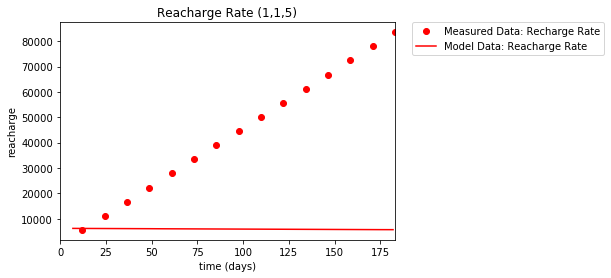

In [95]:
# Plot the drawdown versus time
plt.subplot(1, 1, 1)
ttl = 'Reacharge Rate ({0},{1},{2})'.format(idx[0] + 1, idx[1] + 1, idx[2] + 1) #we are adding 1 to each part of idx to that it prints out the real values and not the code values
plt.title(ttl) #prints/plots title
plt.xlabel('time (days)') #labels the x-axis
plt.ylabel('reacharge') #labels the y-axis
#here we do "0-ts..." in order to show the drawdown of 

plt.plot(ts[:, 0], ts[:, 1], 'ro', label='Measured Data: Recharge Rate') #rch measured data
plt.plot(rch_data2[:, 0], rch_data2[:, 1], 'r-', label='Model Data: Reacharge Rate') #rch model data
plt.xlim(0, ts[:, 0].max())
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #puts the legend to the right of the plot
#plt.ylim(0, (0-ts[:, 1:]).max())

## Table 10.2. 
_Pm-drought groundwater levels (ft) within the model domain._


In [92]:
table2 = pd.read_csv('../Data/table10.2.csv')
print(table2)

    Nodel (col)  Head (ft)
0             1      67.24
1             2      66.71
2             3      65.75
3             4      64.06
4             5      61.91
5             6      59.19
6             7      55.86
7             8      51.91
8             9      47.27
9            10      41.89
10           11      35.70
11           12      28.59
12           13      20.42
13           14      10.99
14           15       0.00


# MODEL INPUT
_The input files that correctly model the transient behavior at the observation well are shown below_


# DISCUSSION OF RESULTS
_The analyst should have obtained a value of 7 in/yr (0.0016 ft/d) for recharge, a 13 in/yr reduction from the pre-drought condition. A common error in model calibration was made if a value of 0.44 in/yr (0.0001 ft/d) was obtained. Prior to running the transient simulation, the modeler should have checked the reasonableness of the given parameters in obtaining the initial conditions. This could be done by running a steady-state simulation with the predrought recharge rate and checking the result with the water levels that “had remained fairly steady for a number of years”. If the 850 ft/d value for hydraulic conductivity were used, the modeler would have noted the heads shown in Table 10.3, which are about 20 ft too high. Because hydraulic conductivity was only an estimate, while other parameters had a fair amount of confidence associated with them, hydraulic conductivity should have been adjusted. A value of 1300 ft/d would have given the desired head distribution. The analyst would have then derived 7 in/yr for recharge by simple trial and error after the hydraulic conductivity adjustment was made._

_Performing a transient calibration without a prior steady-state calibration or isolation of the stress and response (superposition model) is a common mistake. In this example this resulted in the transient response being a combination of seeking equilibrium with the given hydraulic conductivity (rising water levels) and the response to the recharge reduction (falling water levels). For this reason this recharge reduction had to be much higher than if the proper hydraulic conductivity had been used. Franke et al. (1987) discuss this aspect of the importance of initial conditions._


## Table 10.3. 
_Groundwater levels resulting from a steady-state simulation using a hydraulic conductivity of 850 ft/d_


In [93]:
table3 = pd.read_csv('../Data/table10.3.csv')
print(table3)

    Node (col)  Head (ft)
0            1       94.3
1            2       93.6
2            3       92.2
3            4       90.0
4            5       87.2
5            6       83.5
6            7       79.0
7            8       73.7
8            9       67.4
9           10       60.1
10          11       51.5
11          12       41.6
12          13       30.1
13          14       16.4
14          15        0.0
